In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from PerfParser import PerfParser
from Preprocessor import Preprocessor

In [15]:
perf_dir = "perf-report/"
stdout_dir = "stdout/valid/"
category_to_file_path = "tags/category_to_file.json"
tags_path = "tags/tags.json"

In [16]:
preprocessor = Preprocessor(stdout_dir="stdout/")
preprocessor.filter_stdout()

In [17]:
perf_parser = PerfParser(
    perf_dir=perf_dir,
    stdout_dir=stdout_dir,
    category_to_file_path=category_to_file_path,
    tags_path=tags_path,
    normalize=False
)

Initializing CNF Stats...:   0%|          | 0/553 [00:00<?, ?it/s]

Initializing CNF Stats...: 100%|██████████| 553/553 [00:07<00:00, 70.92it/s]


In [18]:
json_out = "stats/cnf_stats.json"
perf_parser.save_stats_to_json(json_out)

In [19]:
agg_json_out = "stats/unnorm_agg_cnf_stats.json"
perf_parser.save_agg_stats_to_json(agg_json_out)

In [20]:
cat_json_out = "stats/unnorm_category_stats.json"
perf_parser.save_category_stats_to_json(cat_json_out)

In [21]:
from PerfTableGenerator import PerfTableGenerator

table_generator = PerfTableGenerator(
    agg_stats_path=agg_json_out,
    category_stats_path=cat_json_out
)

In [22]:
function_table = table_generator.generate_function_table_latex()
print(function_table)
print(function_table)

\begin{tabular}{llll}
\toprule
Function Name & Category & Total Time & Percent Time \\
\midrule
remove\_watched\_clause & sat & 187458.69 & 26.52 \\
set\_literal & sat & 135827.85 & 19.22 \\
update\_relevance\_bit & cache & 56743.22 & 8.03 \\
subsumed\_dtree & dtree & 35313.00 & 5.00 \\
same\_and\_nodes & nnf & 30319.73 & 4.29 \\
add\_watched\_clause & sat & 30035.41 & 4.25 \\
pack\_var\_2bits & cache & 29649.04 & 4.20 \\
update\_subsumption & sat & 24532.87 & 3.47 \\
eliminated & compile & 23261.15 & 3.29 \\
erase\_level & sat & 20154.18 & 2.85 \\
update\_separator\_score & compile & 14526.63 & 2.06 \\
same\_or\_nodes & nnf & 9852.06 & 1.39 \\
apply\_to\_vars & cache & 9726.70 & 1.38 \\
lookup\_cnf\_cache & cache & 9073.36 & 1.28 \\
get\_and\_node & nnf & 7229.89 & 1.02 \\
push\_items\_to\_end & compile & 5577.05 & 0.79 \\
nnf\_node\_cmp & nnf & 5101.40 & 0.72 \\
subs\_cls & compile & 4977.49 & 0.70 \\
move\_watched\_literal & sat & 4579.17 & 0.65 \\
compile\_decomposed & compile & 37

In [23]:
category_table = table_generator.generate_category_table_latex()
print(category_table)

\begin{tabular}{lll}
\toprule
Category & Total Time & Percent Time \\
\midrule
sat & 407406.80 & 59.69 \\
cache & 114467.42 & 16.77 \\
nnf & 64947.08 & 9.52 \\
compile & 58209.91 & 8.53 \\
dtree & 37498.68 & 5.49 \\
\bottomrule
\end{tabular}



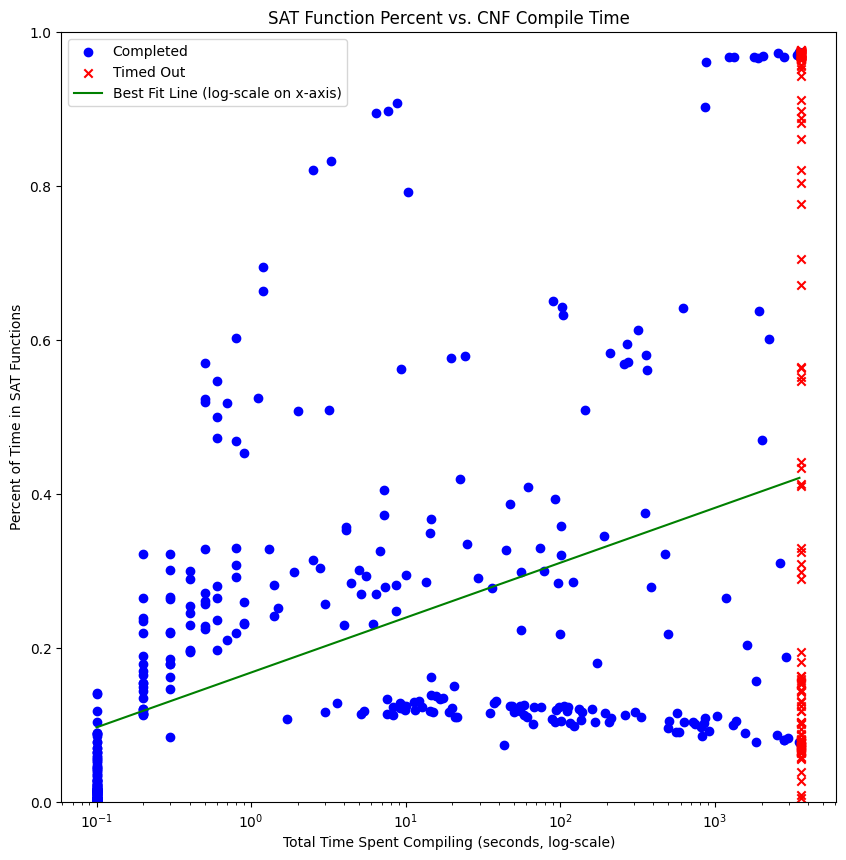

In [24]:
from SatPlotter import SatPlotter

sat_plotter = SatPlotter(cnf_stats_path=json_out)
sat_plotter.plot_sat_time_percent()